In [21]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Dane

In [107]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 20)
    finish = start + np.random.randint(1, 10)
    sentence = [str(x) for x in range(start, finish)]
    
    sentences.append(sentence)

# Model Word2Vec

In [84]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [85]:
model.wv['1']

array([-1.7851485 ,  0.18337783, -1.470221  , -2.512702  ,  2.0814922 ,
        4.4499893 ,  2.565981  , -0.43630606,  3.7118847 ,  1.9241627 ],
      dtype=float32)

In [86]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

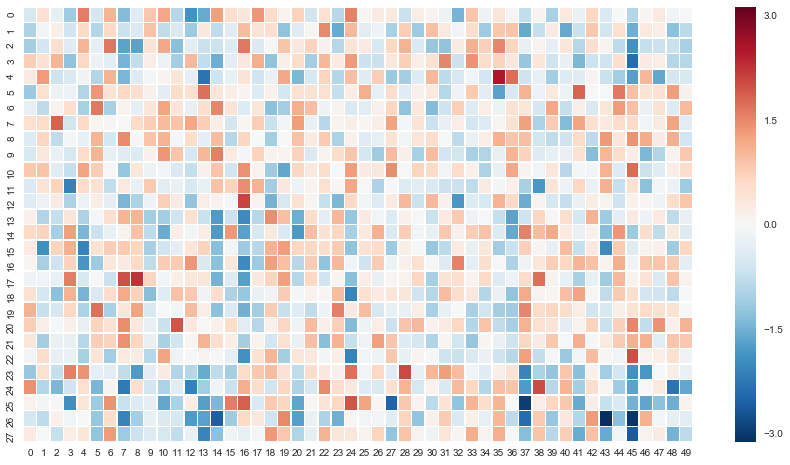

In [108]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

# PCA

In [97]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8,5))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

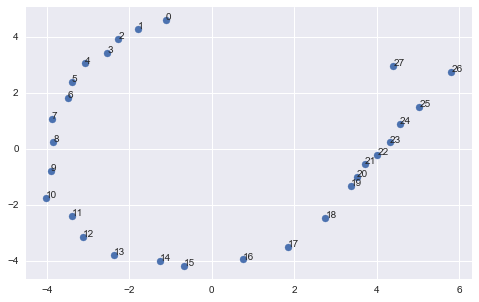

In [109]:
plot_pca(Word2Vec(sentences, size=50, window=10))

# Podobne słowa

In [113]:
model = Word2Vec(sentences, size=300, window=5)

In [114]:
model.wv.most_similar('10', topn=3)

[('11', 0.3403112590312958),
 ('9', 0.3384554386138916),
 ('12', 0.33678779006004333)]

In [115]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('13', 0.36153683066368103),
 ('11', 0.3361404538154602),
 ('12', 0.3095865845680237)]